In [200]:
import numpy as np
import scipy as sp
from scipy import special
import decimal as dc
dc.getcontext().prec = 50

############################################
import matplotlib.pyplot as plt            #
plt.rcParams['figure.figsize'] = (12, 4)   #
############################################

In [198]:
def is_even(x):
    return x % 2 == 0

In [201]:
def bernoulli_num(n):
    B = np.zeros(n+1, dtype=np.dtype(dc.Decimal))
    B[0] = dc.Decimal(1.0)
    for i in range(1, n+1):
        sum = dc.Decimal(0.0)
        for k in range(i):
            sum += dc.Decimal(1.0*sp.special.binom(i+1, k))*dc.Decimal(B[k])
        B[i]=-sum/dc.Decimal(i+1.0)
    return B[n]

print(bernoulli_num(14))

1.1666666666666666666666666666666666666666666666678


In [219]:
def custom_gammaln(x, d=20):
    if x>0:
        loggamma = dc.Decimal(x-0.5)*dc.Decimal(1.0*x).ln() - dc.Decimal(x) + dc.Decimal(0.5)*dc.Decimal(2*np.pi).ln()
        for m in range(1, d+1):
            summand = dc.Decimal(1.0)*bernoulli_num(2*m)/(dc.Decimal(2.0*m)*(dc.Decimal(2.0*m - 1.0)) * dc.Decimal(1.0*x)**dc.Decimal((2.0*m - 1.0)))
            loggamma += summand
        return loggamma
    elif x == 0:
        return np.inf
    else:
        print('No gamma of negative allowed here!')

4.7874917427820459719232453866060902013297019764171
4.78749174278


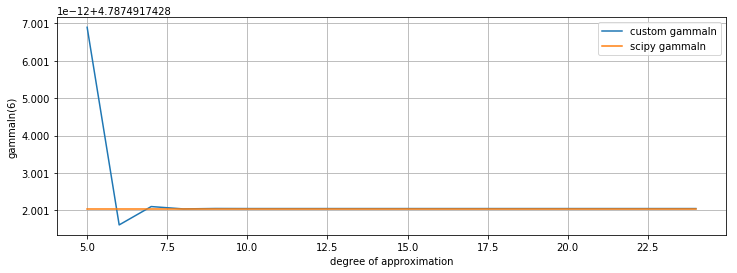

In [229]:
test_val = 6
print(custom_gammaln(test_val))
print(sp.special.gammaln(test_val))

lpl = []
iss = []
for i in range(5,25):
    lpl.append(float(custom_gammaln(test_val, i)))
    iss.append(i)

plt.plot(iss, lpl, label = 'custom gammaln')
plt.xlabel('degree of approximation')
plt.ylabel('gammaln({})'.format(test_val))
plt.plot(iss, np.full(len(iss),sp.special.gammaln(test_val)), label = 'scipy gammaln')
plt.grid(True)
plt.legend(loc = 'best')
#plt.savefig('gammaln.pdf')
plt.show()

In [185]:
def logbinomial(a, b):
    return sp.special.gammaln(a + 1) - sp.special.gammaln(b + 1) - sp.special.gammaln(a - b + 1)

In [186]:
a = 0.0
def pdf_beta(p, s, f):
    return np.exp((s - 1 + a) * np.log(p) + (f - 1 + a) * np.log(1 - p) - sp.special.betaln(s + a, f + a))

In [187]:
def custom_logsumexp(ns):
    tmax = max(ns)
    result = dc.Decimal(tmax) + dc.Decimal(sum([(dc.Decimal(i) - dc.Decimal(tmax)).exp() for i in ns])).ln()
    return result

al = [0.0, 4.8848981731984509, 7.8241012314455247, 9.6741296087975286, 10.704533647439149, 11.037382691690851, 10.729301060372364, 9.7964471384604792, 8.2206371424561837, 5.9432008100282303, 2.8399812234746662, -1.3607233547384965, -7.5176724998214297]
bl = [2.8071942514172008, 6.5186945294646819, 8.8631993925812367, 10.282118981017135, 10.953501207710218, 10.961633037740995, 10.341291609075626, 9.0914655002535767, 7.1753444913208284, 4.5065775497486982, 0.9050001449514582, -4.0729900062196123]

print(sp.special.logsumexp(al, b = 1))
print(sp.special.logsumexp(bl, b = 1))
print(custom_logsumexp(al))
print(custom_logsumexp(bl))
if custom_logsumexp(al)<custom_logsumexp(bl):
    print('Even partsum should not be smaller than odd partsum!')
else:
    print('Everything fine!')

12.1704786203
12.1704786203
12.170478620332385263127516046906469453677890264971
12.170478620332393742527564972281787396370651278432
Even partsum should not be smaller than odd partsum!


In [188]:
def log_hyper_2F1_below_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b1)):
        log_resu = logbinomial(b1 - 1 +a, n) + sp.special.gammaln(a1 + a2 + n +2*a) + sp.special.gammaln(a1 + a2 + b2 + 3*a) - sp.special.gammaln(a1 + a2 + b2 + n + 3*a) - sp.special.gammaln(a1 + a2 + 2*a) + n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    if log_results_odd_partsum > log_results_even_partsum:
        print('Dang!')
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b=[1,-1])
    return log_result

def log_hyper_2F1_above_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b2)):
        log_resu = logbinomial(b2 - 1 +a, n) + sp.special.gammaln(a1 + a2 + n + 2*a) + sp.special.gammaln(a1 + a2 + b1 + 3*a) - sp.special.gammaln(a1 + a2 + b1 + n + 3*a) - sp.special.gammaln(a1 + a2 + 2*a) - n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    #print(log_results_even)
    #print(log_results_odd)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    if log_results_odd_partsum > log_results_even_partsum:
        print('Dang!!!')
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b=[1,-1])
    return log_result

In [189]:
def pdf_bb_ratio(a1, a2, b1, b2, w):
    lnA = sp.special.betaln(a1, b1) + sp.special.betaln(a2, b2)
    def pdf_calc(wi):
        if wi < 0:
            print('Ratio below Zero! Not reasonable!')
            exit(1)
        elif wi == 0:
            resulti = 0
        elif wi < 1:
            resulti = np.exp(sp.special.betaln(a1 + a2, b2) + (a1 - 1) * np.log(wi) + log_hyper_2F1_below_1(a1, a2, b1, b2, wi) - lnA)
        else:
            resulti = np.exp(sp.special.betaln(a1 + a2, b1) - (1 + a2) * np.log(wi) + log_hyper_2F1_above_1(a1, a2, b1, b2, wi) - lnA)
        return resulti
    if isinstance(w, int) or isinstance(w, float):
        result = pdf_calc(w)
    else:
        result = np.zeros(len(w))
        for i in range(len(w)):
            wi = w[i]
            result[i] = pdf_calc(wi)
    return result

In [190]:
def log_hyper_3F2_below_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b1)):
        log_resu = logbinomial(b1 - 1, n) + sp.special.gammaln(a1 + n) + sp.special.gammaln(a1 + a2 + n) + sp.special.gammaln(a1 + 1) + sp.special.gammaln(a1 + a2 + b2) - sp.special.gammaln(a1) - sp.special.gammaln(a1 + a2) - sp.special.gammaln(a1 + n + 1) - sp.special.gammaln(a1 + a2 + b2 + n) + n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b = [1, -1])
    return log_result

def log_hyper_3F2_above_1(a1, a2, b1, b2, w):
    log_results_even = []
    log_results_odd = []
    for n in range(int(b2)):
        log_resu = logbinomial(b2 - 1, n) + sp.special.gammaln(a2 + n) + sp.special.gammaln(a1 + a2 + n) + sp.special.gammaln(a2 + 1) + sp.special.gammaln(a1 + a2 + b1) - sp.special.gammaln(a2) - sp.special.gammaln(a1 + a2) - sp.special.gammaln(a2 + n + 1) - sp.special.gammaln(a1 + a2 + b1 + n) - n * np.log(w)
        if is_even(n):
            log_results_even.append(log_resu)
        else:
            log_results_odd.append(log_resu)
    if len(log_results_odd) == 0:
        log_results_odd_partsum = -np.inf
    else:
        log_results_odd_partsum = sp.special.logsumexp(log_results_odd)
    if len(log_results_even) == 0:
        log_results_even_partsum = -np.inf
    else:
        log_results_even_partsum = sp.special.logsumexp(log_results_even)
    log_result = sp.special.logsumexp([log_results_even_partsum, log_results_odd_partsum], b = [1, -1])
    return log_result

In [191]:
def cdf_bb_ratio(a1, a2, b1, b2, w):
    lnA = sp.special.betaln(a1, b1) + sp.special.betaln(a2, b2)
    def cum_pdf_calc(wi):
        if wi < 0:
            print('Ratio below Zero! Not reasonable!')
            exit(1)
        elif wi == 0:
            resulti = 0
        elif wi < 1:
            resulti = np.exp(sp.special.betaln(a1 + a2, b2) + a1 * np.log(wi) - np.log(a1) + log_hyper_3F2_below_1(a1, a2, b1, b2, wi) - lnA)
        else:
            resulti = 1 - np.exp(sp.special.betaln(a1 + a2, b1) - a2 * np.log(wi) - np.log(a2) + log_hyper_3F2_above_1(a1, a2, b1, b2, wi) - lnA)
        return resulti
    if isinstance(w, int) or isinstance(w, float):
        result = cum_pdf_calc(w)
    else:
        result = np.zeros(len(w))
        for i in range(len(w)):
            wi = w[i]
            result[i] = cum_pdf_calc(wi)
    return result

Expectation value of fraction a/b: $E(\frac{a}{b}) = E(a)\cdot E(b^{-1})$

with $E(a) = \frac{a_1}{a_1+b_1}$

and $E(b^{-1}) = \int_{-\infty}^{\infty}\frac{b^{a_2-2} (1-b)^{b_2-1}}{B(a_2-1, b_2) \left(\frac{a_2-1}{a_2+b_2-1}\right)}\,\mathrm{d}b = \frac{a_2+b_2-1}{a_2-1}$

$\Rightarrow E(\frac{a}{b}) = \frac{a_1\cdot(a_2+b_2-1)}{(a_1+b_1)\cdot(a_2-1)}$

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


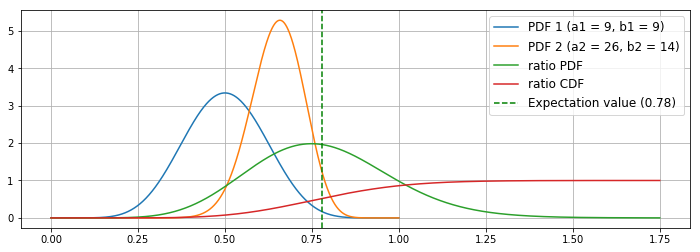

In [192]:
v = np.linspace(0,1.75,1751)
a1 = 9
b1 = 9
a2 = 26
b2 = 14
pdf1 = pdf_beta(v, a1, b1)
pdf2 = pdf_beta(v, a2, b2)
ratio_pdf = pdf_bb_ratio(a1, a2, b1, b2, v)
ratio_cdf = cdf_bb_ratio(a1, a2, b1, b2, v)
plt.plot(v, pdf1, label = 'PDF 1 (a1 = {}, b1 = {})'.format(a1, b1))
plt.plot(v, pdf2, label = 'PDF 2 (a2 = {}, b2 = {})'.format(a2, b2))
plt.plot(v, ratio_pdf, label = 'ratio PDF')
plt.plot(v, ratio_cdf, label = 'ratio CDF')

expect_value = (a1*(a2+b2-1))/((a1+b1)*(a2-1))

#plt.axvline(x = (a1/(a1+b1))/(a2/(a2+b2)), linewidth = 1.25, color = 'purple', linestyle = '-.', label = 'Naive ({})'.format((a1/(a1+b1))/(a2/(a2+b2))), alpha = .5)
plt.axvline(x = expect_value, linewidth = 1.5, color = 'green', linestyle = '--', label = 'Expectation value ({})'.format(expect_value))

plt.grid(True)
plt.legend(loc = 'best', fontsize = 'large')
plt.show()